In [161]:
import numpy as np
import pandas as pd
import json

In [162]:
picks = pd.read_parquet('../Data/all_pick_counts.parquet')

In [163]:
with open("../Data/matchups_2024_2025.json", "r") as f:
    matchups = json.load(f)

# Access seasons
matchups_2024 = matchups["2024"]
matchups_2025 = matchups["2025"]


In [164]:
import pandas as pd

rows = []

for week, matchups in matchups_2025.items():
    week_num = int(week.replace("week_", ""))

    for m in matchups:
        row = {
            "week": week_num,
            "roster_id": m["roster_id"],
            "matchup_id": m["matchup_id"],
            "points": m["points"],
            "starters_points": sum(m["starters_points"]),
            "players": m["players"],
            "starters": m["starters"]
        }
        rows.append(row)

matchups_df_2025 = pd.DataFrame(rows)


In [165]:
rows = []

for week, matchups in matchups_2024.items():
    week_num = int(week.replace("week_", ""))

    for m in matchups:
        row = {
            "week": week_num,
            "roster_id": m["roster_id"],
            "matchup_id": m["matchup_id"],
            "points": m["points"],
            "starters_points": sum(m["starters_points"]),
            "players": m["players"],
            "starters": m["starters"]
        }
        rows.append(row)

matchups_df_2024 = pd.DataFrame(rows)


In [167]:
matchups_df_2024.head()

,week,roster_id,matchup_id,points,starters_points,players,starters
0,1,1,4,119.54,119.54,"[4234, 11619, 11566, 9753, 9502, 9497, 11625, ...","[4046, 8205, 4199, 2309, 9502, 4950, 4217, 102..."
1,1,2,1,129.44,129.44,"[7588, 6813, 11640, 6819, 11643, 11568, 8210, ...","[6770, 6813, 4866, 6786, 3321, 7547, 4066, 814..."
2,1,3,4,139.00,139.00,"[10859, 11306, 11565, 11575, 11584, 11589, 116...","[9758, 6130, 5967, 9756, 5947, 8148, 10859, 86..."
3,1,4,2,158.90,158.90,"[11629, 1234, 1466, 1689, 2374, 2749, 3225, 40...","[4881, 8136, 8138, 9997, 9488, 4039, 1466, 403..."
4,1,5,1,117.02,117.02,"[6865, 5846, 5001, 5970, 7594, 5045, 4984, 975...","[4984, 4034, 8150, 4983, 5846, 4082, 5001, 401..."


In [139]:
ROSTER_TO_OWNER = {
    1: "Jose",
    2: "Daryl",
    3: "Gio",
    4: "Brigido",
    5: "Luis",
    6: "Lalo",
    7: "Devonte",
    8: "Marvin",
    9: "Jacky",
    10: "Bryan"
}
matchups_df_2025["owner"] = matchups_df_2025["roster_id"].map(ROSTER_TO_OWNER)
matchups_df_2024["owner"] = matchups_df_2024["roster_id"].map(ROSTER_TO_OWNER)


In [140]:
matchups_df_2025['year'] = 2025
matchups_df_2024['year'] = 2024

combined_df = pd.concat([matchups_df_2024, matchups_df_2025], ignore_index=True)


In [141]:
combined_df.head()

,week,roster_id,matchup_id,points,starters_points,players,starters,owner,year
0,1,1,4,119.54,119.54,"[4234, 11619, 11566, 9753, 9502, 9497, 11625, ...","[4046, 8205, 4199, 2309, 9502, 4950, 4217, 102...",Jose,2024
1,1,2,1,129.44,129.44,"[7588, 6813, 11640, 6819, 11643, 11568, 8210, ...","[6770, 6813, 4866, 6786, 3321, 7547, 4066, 814...",Daryl,2024
2,1,3,4,139.00,139.00,"[10859, 11306, 11565, 11575, 11584, 11589, 116...","[9758, 6130, 5967, 9756, 5947, 8148, 10859, 86...",Gio,2024
3,1,4,2,158.90,158.90,"[11629, 1234, 1466, 1689, 2374, 2749, 3225, 40...","[4881, 8136, 8138, 9997, 9488, 4039, 1466, 403...",Brigido,2024
4,1,5,1,117.02,117.02,"[6865, 5846, 5001, 5970, 7594, 5045, 4984, 975...","[4984, 4034, 8150, 4983, 5846, 4082, 5001, 401...",Luis,2024


In [142]:
import pandas as pd

# Aggregate total points per owner per season
owner_season_points = combined_df.groupby(['year', 'owner'])['points'].sum().reset_index()

# Or average points per week
owner_season_avg = combined_df.groupby(['year', 'owner'])['points'].mean().reset_index()


In [143]:
owner_season_avg

,year,owner,points
0,2024,Brigido,163.376923
1,2024,Bryan,149.200000
2,2024,Daryl,165.096923
3,2024,Devonte,162.286154
4,2024,Gio,119.760000
5,2024,Jacky,137.392308
6,2024,Jose,127.998462
7,2024,Lalo,139.804615
8,2024,Luis,146.324615
9,2024,Marvin,128.406154


In [144]:
pivot_df = owner_season_points.pivot(index='owner', columns='year', values='points').reset_index()
pivot_df


year,owner,2024,2025
0,Brigido,2123.90,1725.52
1,Bryan,1939.60,1901.08
2,Daryl,2146.26,2003.16
3,Devonte,2109.72,2281.54
4,Gio,1556.88,1768.52
5,Jacky,1786.10,1917.22
6,Jose,1663.98,1699.88
7,Lalo,1817.46,1949.46
8,Luis,1902.22,1991.46
9,Marvin,1669.28,1694.70


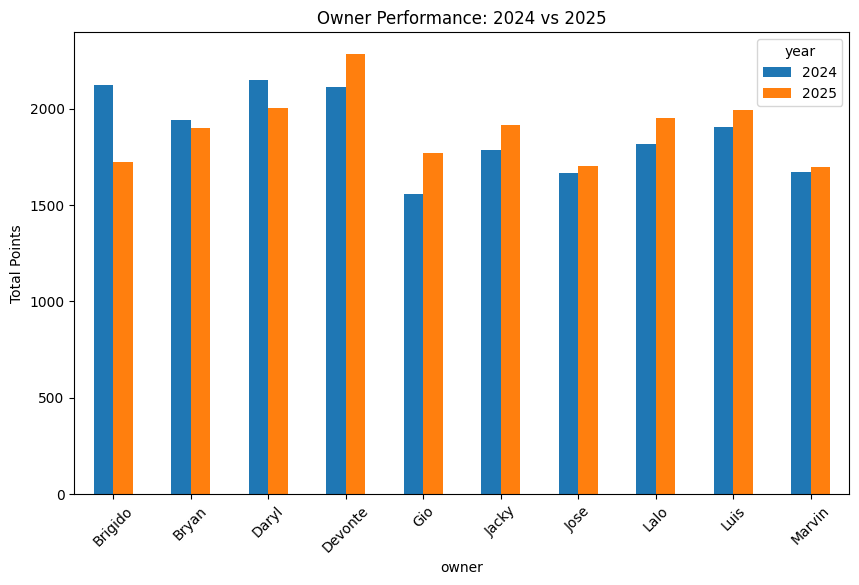

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df.set_index('owner').plot(kind='bar', figsize=(10,6))
plt.ylabel('Total Points')
plt.title('Owner Performance: 2024 vs 2025')
plt.xticks(rotation=45)
plt.show()


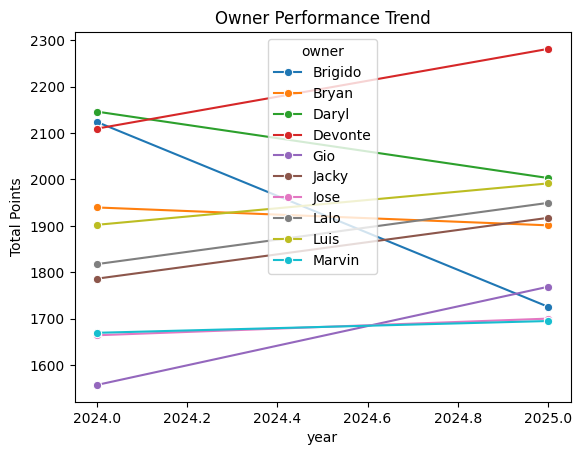

In [146]:
sns.lineplot(data=owner_season_points, x='year', y='points', hue='owner', marker='o')
plt.title('Owner Performance Trend')
plt.ylabel('Total Points')
plt.show()


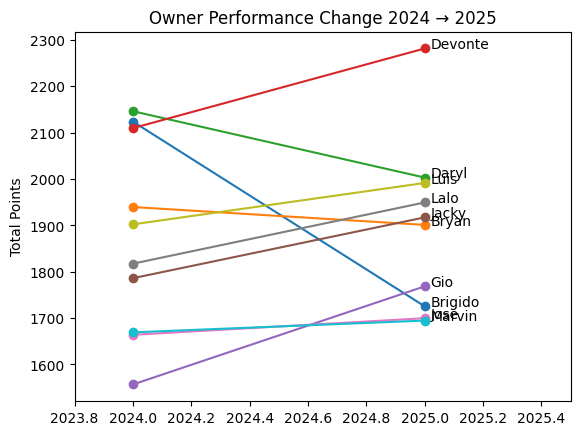

In [147]:
for idx, row in pivot_df.iterrows():
    plt.plot([2024, 2025], [row[2024], row[2025]], marker='o')
    plt.text(2025 + 0.02, row[2025], row['owner'])

plt.xlim(2023.8, 2025.5)
plt.ylabel('Total Points')
plt.title('Owner Performance Change 2024 → 2025')
plt.show()


In [148]:
pivot_df['perc_change'] = ((pivot_df[2025] - pivot_df[2024])/pivot_df[2024]) * 100
pivot_df.sort_values('perc_change')

year,owner,2024,2025,perc_change
0,Brigido,2123.90,1725.52,-18.757004
2,Daryl,2146.26,2003.16,-6.667412
1,Bryan,1939.60,1901.08,-1.985976
9,Marvin,1669.28,1694.70,1.522812
6,Jose,1663.98,1699.88,2.157478
8,Luis,1902.22,1991.46,4.691361
7,Lalo,1817.46,1949.46,7.262883
5,Jacky,1786.10,1917.22,7.341134
3,Devonte,2109.72,2281.54,8.144209
4,Gio,1556.88,1768.52,13.593854


In [149]:
picks = picks[(picks['year'] == 2026) | (picks['year'] ==2027)].drop_duplicates()
picks

,owner_name,year,rd_1,rd_2,rd_3,rd_4,pick_score,pick_score_norm
20,Lalo,2026,3,2,3,0,5.3,1.000000
22,Jose,2026,2,1,3,3,3.9,0.735849
24,Bryan,2026,2,2,0,2,3.6,0.679245
26,Marvin,2026,2,1,2,2,3.5,0.660377
28,Gio,2026,0,3,1,3,2.7,0.509434
30,Luis,2026,1,1,0,0,1.7,0.320755
32,Brigido,2026,0,0,1,0,0.3,0.056604
34,Daryl,2026,0,0,0,0,0.0,0.000000
35,Devonte,2026,0,0,0,0,0.0,0.000000
36,Jacky,2026,0,0,0,0,0.0,0.000000


In [150]:
pivot_df['perf_norm'] = (
    pivot_df['perc_change'] - pivot_df['perc_change'].min()
) / (
    pivot_df['perc_change'].max() - pivot_df['perc_change'].min()
)
pivot_df

year,owner,2024,2025,perc_change,perf_norm
0,Brigido,2123.90,1725.52,-18.757004,0.000000
1,Bryan,1939.60,1901.08,-1.985976,0.518411
2,Daryl,2146.26,2003.16,-6.667412,0.373702
3,Devonte,2109.72,2281.54,8.144209,0.831546
4,Gio,1556.88,1768.52,13.593854,1.000000
5,Jacky,1786.10,1917.22,7.341134,0.806722
6,Jose,1663.98,1699.88,2.157478,0.646489
7,Lalo,1817.46,1949.46,7.262883,0.804303
8,Luis,1902.22,1991.46,4.691361,0.724814
9,Marvin,1669.28,1694.70,1.522812,0.626871


In [151]:
future_picks = picks[picks['year'].isin([2026, 2027])]

fcs = (
    future_picks
    .assign(weight=lambda x: x['year'].map({2026: 0.6, 2027: 0.4}))
    .groupby('owner_name')
    .apply(lambda x: (x['pick_score_norm'] * x['weight']).sum())
    .reset_index(name='future_capital_score')
)


/var/folders/yw/4djwspfd71dd2kz47p89ghvm0000gn/T/ipykernel_2799/3913550916.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  future_picks


In [152]:
fcs

,owner_name,future_capital_score
0,Brigido,0.033962
1,Bryan,0.807547
2,Daryl,0.000000
3,Devonte,0.013115
4,Gio,0.515496
5,Jacky,0.072131
6,Jose,0.716919
7,Lalo,0.822951
8,Luis,0.238354
9,Marvin,0.533931


In [153]:
pivot_with_fcs = pivot_df.merge(
    fcs,
    left_on='owner',
    right_on='owner_name',
    how='left'
)
pivot_with_fcs

,owner,2024,2025,perc_change,perf_norm,owner_name,future_capital_score
0,Brigido,2123.90,1725.52,-18.757004,0.000000,Brigido,0.033962
1,Bryan,1939.60,1901.08,-1.985976,0.518411,Bryan,0.807547
2,Daryl,2146.26,2003.16,-6.667412,0.373702,Daryl,0.000000
3,Devonte,2109.72,2281.54,8.144209,0.831546,Devonte,0.013115
4,Gio,1556.88,1768.52,13.593854,1.000000,Gio,0.515496
5,Jacky,1786.10,1917.22,7.341134,0.806722,Jacky,0.072131
6,Jose,1663.98,1699.88,2.157478,0.646489,Jose,0.716919
7,Lalo,1817.46,1949.46,7.262883,0.804303,Lalo,0.822951
8,Luis,1902.22,1991.46,4.691361,0.724814,Luis,0.238354
9,Marvin,1669.28,1694.70,1.522812,0.626871,Marvin,0.533931


In [154]:
pivot_with_fcs['cps'] = (
    0.5 * pivot_with_fcs['perf_norm']
    + 0.5 * pivot_with_fcs['future_capital_score']
)
pivot_with_fcs

,owner,2024,2025,perc_change,perf_norm,owner_name,future_capital_score,cps
0,Brigido,2123.90,1725.52,-18.757004,0.000000,Brigido,0.033962,0.016981
1,Bryan,1939.60,1901.08,-1.985976,0.518411,Bryan,0.807547,0.662979
2,Daryl,2146.26,2003.16,-6.667412,0.373702,Daryl,0.000000,0.186851
3,Devonte,2109.72,2281.54,8.144209,0.831546,Devonte,0.013115,0.422330
4,Gio,1556.88,1768.52,13.593854,1.000000,Gio,0.515496,0.757748
5,Jacky,1786.10,1917.22,7.341134,0.806722,Jacky,0.072131,0.439426
6,Jose,1663.98,1699.88,2.157478,0.646489,Jose,0.716919,0.681704
7,Lalo,1817.46,1949.46,7.262883,0.804303,Lalo,0.822951,0.813627
8,Luis,1902.22,1991.46,4.691361,0.724814,Luis,0.238354,0.481584
9,Marvin,1669.28,1694.70,1.522812,0.626871,Marvin,0.533931,0.580401


In [155]:
avg_pf_change = (pivot_df[2025] - pivot_df[2024]).mean()
std_pf_change = (pivot_df[2025] - pivot_df[2024]).std()
avg_pf_change

np.float64(21.713999999999963)

In [156]:
improvements = pd.DataFrame(avg_pf_change + (pivot_with_fcs['cps'] - pivot_with_fcs['cps'].mean()) * std_pf_change)
improvements['owner'] = ['Brigido', 'Bryan', 'Daryl', 'Devonte', 'Gio', 'Jacky', 'Jose', 'Lalo', 'Luis', 'Marvin']
improvements

,cps,owner
0,-66.492122,Brigido
1,50.420158,Bryan
2,-35.749145,Daryl
3,6.867699,Devonte
4,67.571456,Gio
5,9.961767,Jacky
6,53.809065,Jose
7,77.684333,Lalo
8,17.591492,Luis
9,35.475297,Marvin
